<a href="https://colab.research.google.com/github/krish-hayagriva/NLP-Case-Study-1/blob/main/BA_Case_study_clf_Tree_ricedata_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification Problem

Importing Libraries

In [148]:
import pandas as pd

In [149]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [150]:
pip install -U scikit-learn

Importing and reading the dataset

In [151]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [152]:

ricedata = pd.read_csv("/content/drive/My Drive/rice.csv")


Reading the rice dataframe

In [153]:
ricedata


,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.23,64.01,0.72,4677,76.00,0.66,273.09,0.76,1.44,jasmine
1,2,2872,74.69,51.40,0.73,3015,60.47,0.71,208.32,0.83,1.45,jasmine
2,3,3048,76.29,52.04,0.73,3132,62.30,0.76,210.01,0.87,1.47,jasmine
3,4,3073,77.03,51.93,0.74,3157,62.55,0.78,210.66,0.87,1.48,jasmine
4,5,3693,85.12,56.37,0.75,3802,68.57,0.77,230.33,0.87,1.51,jasmine
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.62,51.03,0.94,6008,86.33,0.50,332.96,0.66,2.91,Gonen
18181,18182,7585,169.59,58.14,0.94,7806,98.27,0.65,385.51,0.64,2.92,Gonen
18182,18183,6365,154.78,52.91,0.94,6531,90.02,0.56,342.25,0.68,2.93,Gonen
18183,18184,5960,151.40,51.47,0.94,6189,87.11,0.49,343.37,0.64,2.94,Gonen


In [154]:
ricedata.isnull().sum()

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

In [155]:
ricedata = ricedata[["Area","MajorAxisLength","MinorAxisLength","Eccentricity","ConvexArea","EquivDiameter","Extent","Perimeter","Roundness","AspectRation","Class" ]]

In [156]:
ricedata = ricedata.rename(columns={'Area': 'area', 'MajorAxisLength': 'maxis', 'MinorAxisLength':'minaxis','Eccentricity':'ecc','ConvexArea':'cvarea','EquivDiameter':'ediam','Extent':'extnt','Perimeter':'pmeter','AspectRation':'aspectr','Class':'ricetyp'})


In [157]:
ricedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area       18185 non-null  int64  
 1   maxis      18185 non-null  float64
 2   minaxis    18185 non-null  float64
 3   ecc        18185 non-null  float64
 4   cvarea     18185 non-null  int64  
 5   ediam      18185 non-null  float64
 6   extnt      18185 non-null  float64
 7   pmeter     18185 non-null  float64
 8   Roundness  18185 non-null  float64
 9   aspectr    18185 non-null  float64
 10  ricetyp    18185 non-null  object 
dtypes: float64(8), int64(2), object(1)
memory usage: 1.5+ MB


In [158]:
ricedata.describe()

,area,maxis,minaxis,ecc,cvarea,ediam,extnt,pmeter,Roundness,aspectr
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,7036.492989,151.680764,59.807854,0.915399,7225.817872,94.132967,0.616651,351.607424,0.707996,2.599092
std,1467.197150,12.376392,10.061659,0.030720,1502.006571,9.906275,0.104400,29.500635,0.067363,0.434875
min,2522.000000,74.130000,34.410000,0.680000,2579.000000,56.670000,0.380000,197.020000,0.170000,1.360000
25%,5962.000000,145.680000,51.390000,0.890000,6125.000000,87.130000,0.540000,333.990000,0.650000,2.210000
50%,6660.000000,153.880000,55.720000,0.920000,6843.000000,92.090000,0.600000,353.090000,0.700000,2.600000
75%,8423.000000,160.060000,70.160000,0.940000,8645.000000,103.560000,0.700000,373.000000,0.770000,2.960000
max,10210.000000,183.210000,82.550000,0.970000,11008.000000,114.020000,0.890000,508.510000,0.900000,3.910000


In [159]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x , y, random_state=0)

In [160]:
x = pd.DataFrame(ricedata.iloc[:, 0:9])
y = pd.DataFrame(ricedata.iloc[:,10])
print(x.tail(10))


       area   maxis  minaxis   ecc  cvarea   ediam  extnt  pmeter  Roundness
18175  9101  183.21    65.03  0.93    9431  107.65   0.47  414.05       0.67
18176  7595  166.37    59.05  0.93    7734   98.34   0.48  371.32       0.69
18177  5865  146.17    51.62  0.94    6011   86.41   0.55  326.86       0.69
18178  6165  149.40    52.69  0.94    6295   88.60   0.66  339.23       0.67
18179  5757  146.51    50.65  0.94    5859   85.62   0.48  326.51       0.68
18180  5853  148.62    51.03  0.94    6008   86.33   0.50  332.96       0.66
18181  7585  169.59    58.14  0.94    7806   98.27   0.65  385.51       0.64
18182  6365  154.78    52.91  0.94    6531   90.02   0.56  342.25       0.68
18183  5960  151.40    51.47  0.94    6189   87.11   0.49  343.37       0.64
18184  6134  153.08    51.59  0.94    6283   88.37   0.49  338.61       0.67


Before we begin any analzis , we standardize the data across all variables. This is necessary as we see that data is very skewed between features acmong the two classes Jasmine and Gonen rice types.

In [161]:
type(x)
type(y)

pandas.core.frame.DataFrame

In [162]:
ctendency = ricedata.groupby(['ricetyp']).mean()
ctendency
ricedata['ricetyp'].value_counts()

jasmine    9985
Gonen      8200
Name: ricetyp, dtype: int64

One hot encoding of rice type column can be done as below. However since we are going to solve the problem of classification using Decision Tree, we need not one hot encode the column ricetype.

coding the rice type column as one hot codes

One hot encoding of rice type column can be done as below. However since we are going to solve the problem of classification using Decision Tree, we need not one hot encode the column ricetype.

In [163]:
pd.get_dummies(ricedata,columns=['ricetyp']).tail(10)

,area,maxis,minaxis,ecc,cvarea,ediam,extnt,pmeter,Roundness,aspectr,ricetyp_Gonen,ricetyp_jasmine
18175,9101,183.21,65.03,0.93,9431,107.65,0.47,414.05,0.67,2.82,1,0
18176,7595,166.37,59.05,0.93,7734,98.34,0.48,371.32,0.69,2.82,1,0
18177,5865,146.17,51.62,0.94,6011,86.41,0.55,326.86,0.69,2.83,1,0
18178,6165,149.40,52.69,0.94,6295,88.60,0.66,339.23,0.67,2.84,1,0
18179,5757,146.51,50.65,0.94,5859,85.62,0.48,326.51,0.68,2.89,1,0
18180,5853,148.62,51.03,0.94,6008,86.33,0.50,332.96,0.66,2.91,1,0
18181,7585,169.59,58.14,0.94,7806,98.27,0.65,385.51,0.64,2.92,1,0
18182,6365,154.78,52.91,0.94,6531,90.02,0.56,342.25,0.68,2.93,1,0
18183,5960,151.40,51.47,0.94,6189,87.11,0.49,343.37,0.64,2.94,1,0
18184,6134,153.08,51.59,0.94,6283,88.37,0.49,338.61,0.67,2.97,1,0


In [164]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler() # defining the standard scaler
X_scaled = pd.DataFrame(sclr.fit_transform(x)) # transforming all features into a standardized form
print(X_scaled)
type(X_scaled)



              0         1         2         3         4         5         6  \
0     -1.703630 -4.803694  0.417651 -6.360715 -1.696989 -1.830503  0.415237   
1     -2.838478 -6.220947 -0.835656 -6.035191 -2.803539 -3.398239  0.894178   
2     -2.718519 -6.091665 -0.772046 -6.035191 -2.725641 -3.213503  1.373119   
3     -2.701479 -6.031872 -0.782979 -5.709666 -2.708996 -3.188265  1.564696   
4     -2.278893 -5.378191 -0.341688 -5.384142 -2.279559 -2.580553  1.468907   
...         ...       ...       ...       ...       ...       ...       ...   
18180 -0.806657 -0.247313 -0.872430  0.800824 -0.810816 -0.787701 -1.117375   
18181  0.373857  1.447088 -0.165768  0.800824  0.386282  0.417629  0.319449   
18182 -0.457683  0.250422 -0.685577  0.800824 -0.462606 -0.415199 -0.542646   
18183 -0.733727 -0.022686 -0.828699  0.800824 -0.690307 -0.708961 -1.213163   
18184 -0.615131  0.113060 -0.816772  0.800824 -0.627723 -0.581765 -1.213163   

              7         8  
0     -2.661624  0.7720

pandas.core.frame.DataFrame

Plotting the variables in a scatter plot 

In [165]:
corr_matrix = ricedata.corr()
print(corr_matrix)
type(ricedata)

               area     maxis   minaxis       ecc    cvarea     ediam  \
area       1.000000  0.599936  0.930215 -0.547336  0.999362  0.998158   
maxis      0.599936  1.000000  0.273210  0.294857  0.602058  0.617999   
minaxis    0.930215  0.273210  1.000000 -0.804891  0.928992  0.923791   
ecc       -0.547336  0.294857 -0.804891  1.000000 -0.545176 -0.532027   
cvarea     0.999362  0.602058  0.928992 -0.545176  1.000000  0.997403   
ediam      0.998158  0.617999  0.923791 -0.532027  0.997403  1.000000   
extnt      0.230947 -0.073161  0.308867 -0.328809  0.227771  0.226355   
pmeter     0.881541  0.870176  0.674252 -0.164807  0.886988  0.891567   
Roundness  0.620078 -0.202128  0.833680 -0.898622  0.609832  0.607035   
aspectr   -0.623985  0.240445 -0.860509  0.946209 -0.621476 -0.609964   

              extnt    pmeter  Roundness   aspectr  
area       0.230947  0.881541   0.620078 -0.623985  
maxis     -0.073161  0.870176  -0.202128  0.240445  
minaxis    0.308867  0.674252   0.833

pandas.core.frame.DataFrame

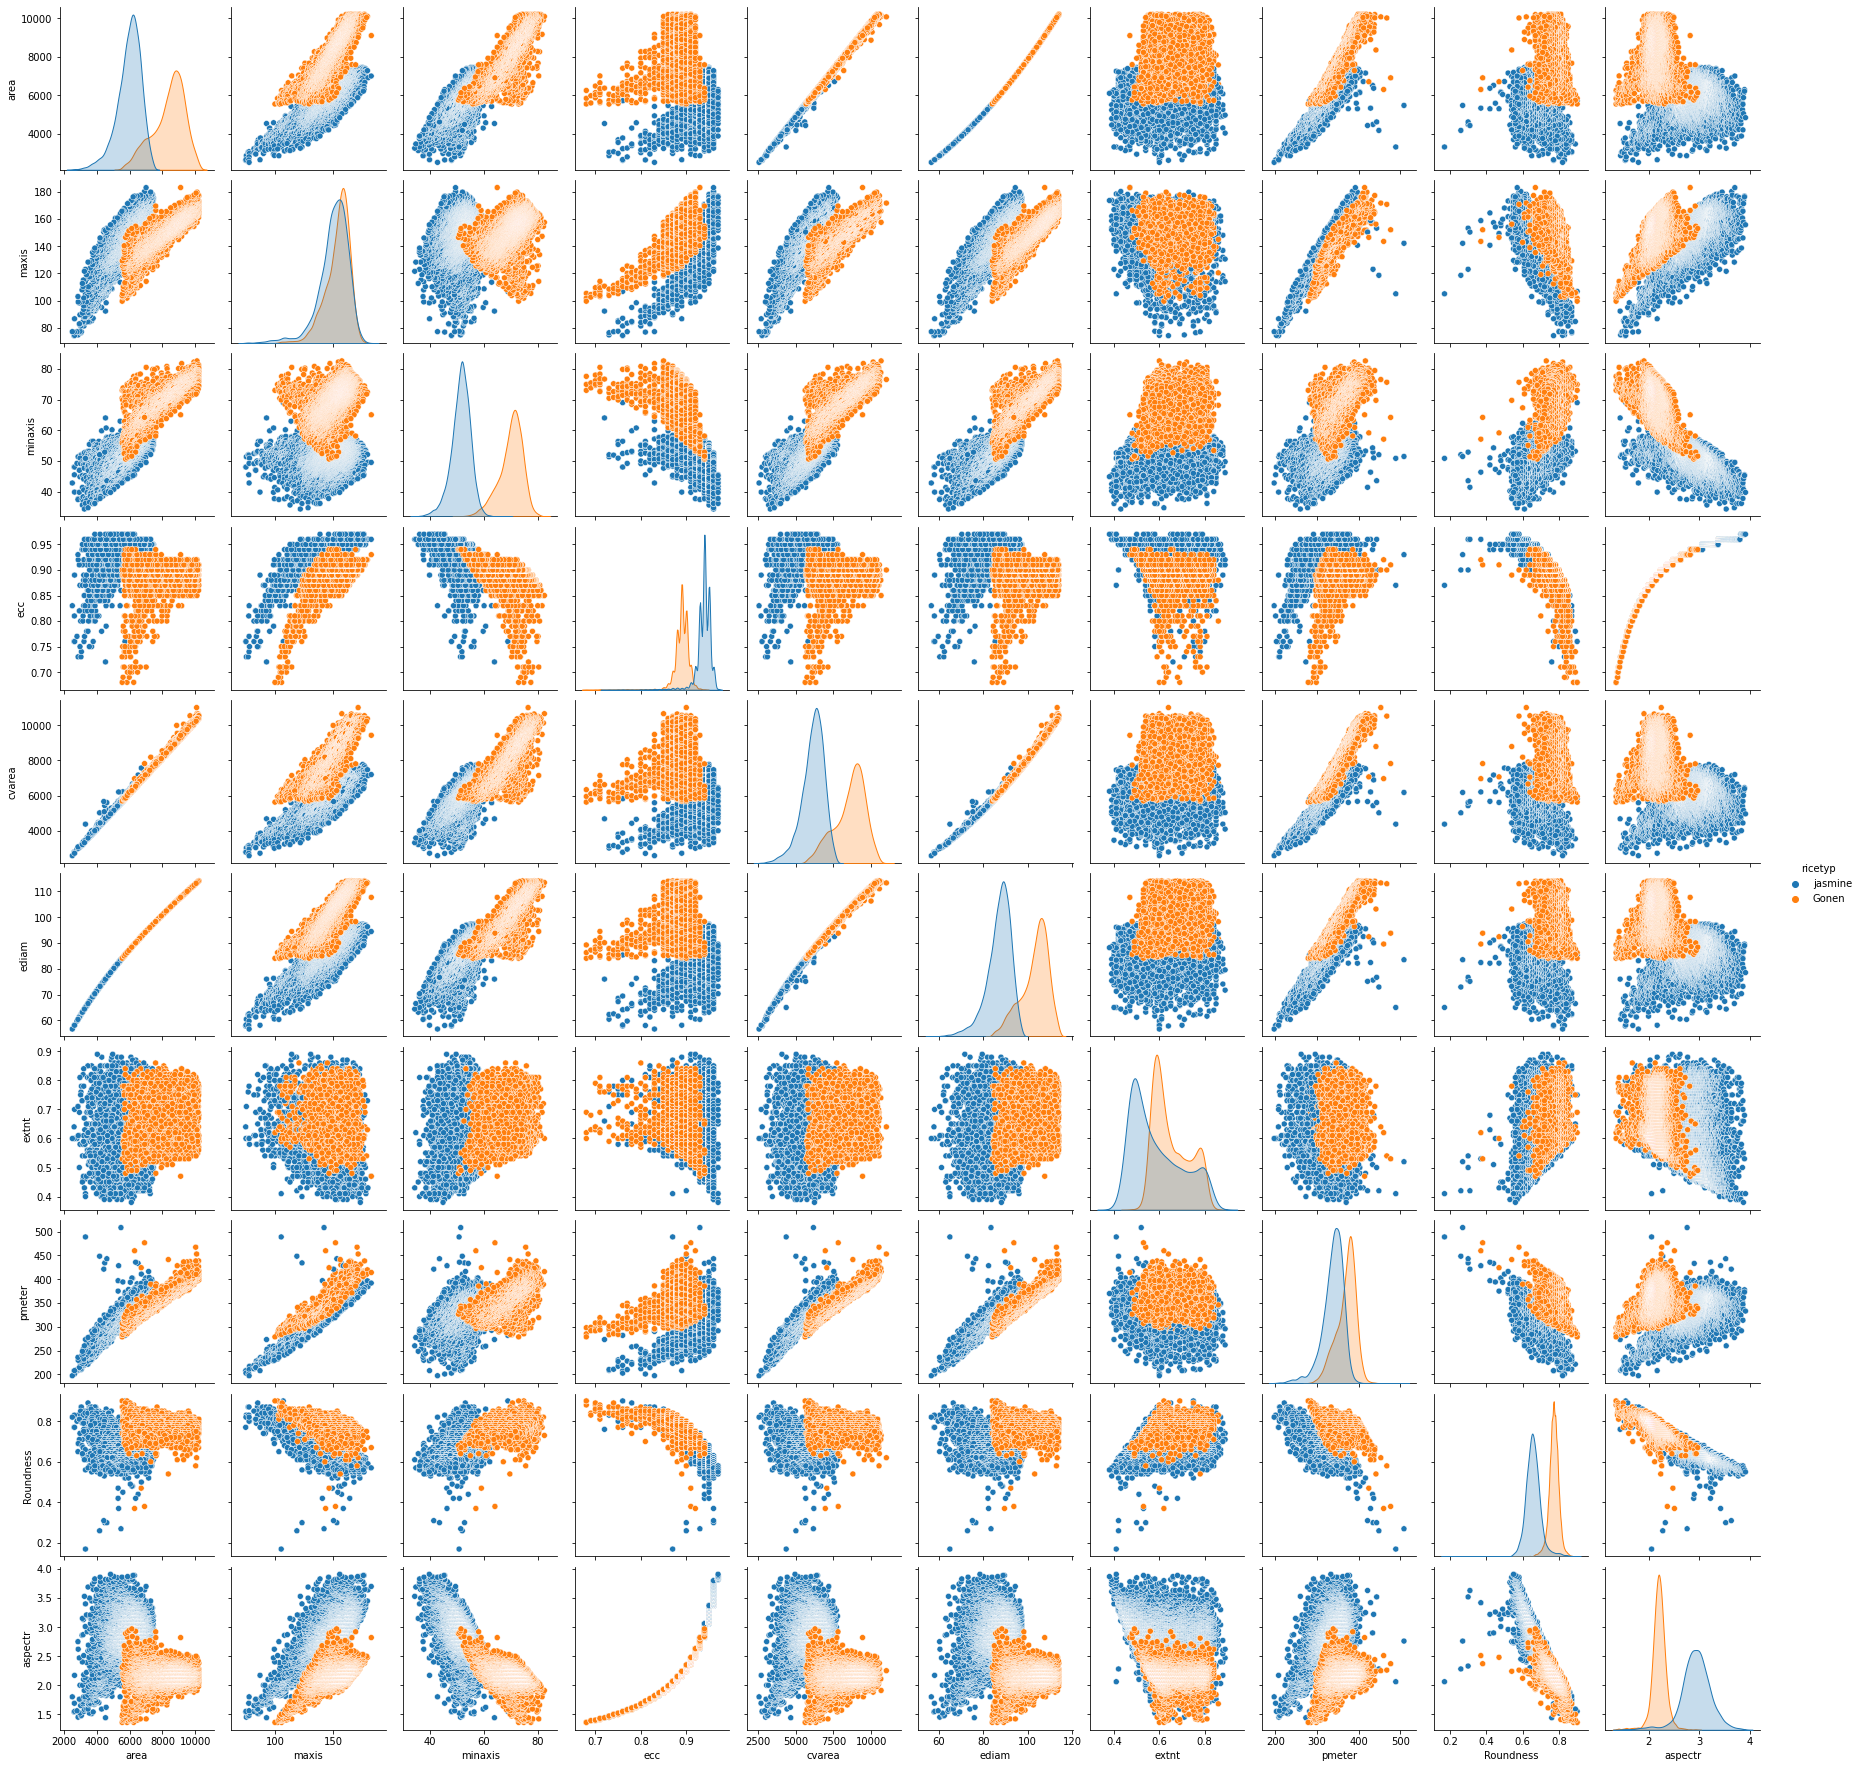

In [166]:
import seaborn as sns
rice_plot1 = sns.pairplot(ricedata, hue ='ricetyp')

In [167]:

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state= 0, max_depth = 6,criterion = 'gini')
clf.fit(X_scaled,y)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [168]:
y.head(5)

,ricetyp
0,jasmine
1,jasmine
2,jasmine
3,jasmine
4,jasmine


In [169]:
y_pred =pd.DataFrame(clf.predict(X_scaled))


In [170]:
y_pred.head(5)

,0
0,jasmine
1,jasmine
2,jasmine
3,jasmine
4,jasmine


In [171]:
print(y_pred)

             0
0      jasmine
1      jasmine
2      jasmine
3      jasmine
4      jasmine
...        ...
18180  jasmine
18181    Gonen
18182  jasmine
18183  jasmine
18184  jasmine

[18185 rows x 1 columns]


In [172]:
y_predprob = clf.predict_proba(X_scaled)
y_predprob = pd.DataFrame(y_pred)


In [173]:
print(y_pred)

             0
0      jasmine
1      jasmine
2      jasmine
3      jasmine
4      jasmine
...        ...
18180  jasmine
18181    Gonen
18182  jasmine
18183  jasmine
18184  jasmine

[18185 rows x 1 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[8087  113]
 [  38 9947]]


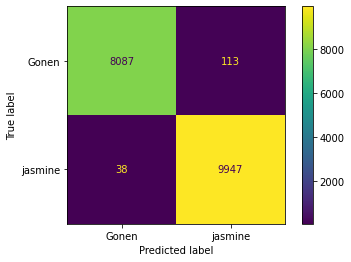

In [174]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,X_scaled,y)
cm= confusion_matrix(y, y_pred)

print(cm)  

In [175]:
print(metrics.classification_report(y, y_pred, labels=['Gonen','jasmine']))

              precision    recall  f1-score   support

       Gonen       1.00      0.99      0.99      8200
     jasmine       0.99      1.00      0.99      9985

    accuracy                           0.99     18185
   macro avg       0.99      0.99      0.99     18185
weighted avg       0.99      0.99      0.99     18185



In [176]:
from sklearn.model_selection import cross_validate
from sklearn import metrics

Since the Rice data set was not split into training and test data, we preferred to carry out cross validation with 10 k folds. The above provides the cross validation score for binary class 'Gonen' and 'jasmine'

In [177]:
scores = ['precision_macro','recall_macro','accuracy']
cv_rtree = cross_validate(clf, X_scaled, y,scoring = scores, cv=20,return_estimator=True)
cv_rtree = pd.DataFrame(cv_rtree)
cv_rtree


,fit_time,score_time,estimator,test_precision_macro,test_recall_macro,test_accuracy
0,0.098146,0.015216,"DecisionTreeClassifier(max_depth=6, random_sta...",0.862191,0.844000,0.828571
1,0.097227,0.015209,"DecisionTreeClassifier(max_depth=6, random_sta...",0.902750,0.901000,0.891209
2,0.097687,0.015369,"DecisionTreeClassifier(max_depth=6, random_sta...",0.995169,0.996000,0.995604
3,0.098449,0.015028,"DecisionTreeClassifier(max_depth=6, random_sta...",0.992953,0.993780,0.993407
4,0.102645,0.015183,"DecisionTreeClassifier(max_depth=6, random_sta...",0.998783,0.999000,0.998901
5,0.099220,0.015738,"DecisionTreeClassifier(max_depth=6, random_sta...",0.997573,0.997996,0.997800
6,0.101224,0.015512,"DecisionTreeClassifier(max_depth=6, random_sta...",1.000000,1.000000,1.000000
7,0.101704,0.025072,"DecisionTreeClassifier(max_depth=6, random_sta...",1.000000,1.000000,1.000000
8,0.098512,0.015840,"DecisionTreeClassifier(max_depth=6, random_sta...",1.000000,1.000000,1.000000
9,0.098271,0.015469,"DecisionTreeClassifier(max_depth=6, random_sta...",0.998004,0.997561,0.997800


In [178]:
print(cv_rtree['test_accuracy'].describe())



count    20.000000
mean      0.973063
std       0.062769
min       0.781078
25%       0.994226
50%       0.997800
75%       1.000000
max       1.000000
Name: test_accuracy, dtype: float64


[Text(0.5496794871794872, 0.9285714285714286, 'X[2] <= -0.03\ngini = 0.495\nsamples = 18185\nvalue = [8200, 9985]'),
 Text(0.32211538461538464, 0.7857142857142857, 'X[2] <= -0.207\ngini = 0.039\nsamples = 10115\nvalue = [200, 9915]'),
 Text(0.18269230769230768, 0.6428571428571429, 'X[2] <= -0.323\ngini = 0.018\nsamples = 9816\nvalue = [87, 9729]'),
 Text(0.10256410256410256, 0.5, 'X[8] <= -0.044\ngini = 0.01\nsamples = 9476\nvalue = [50, 9426]'),
 Text(0.05128205128205128, 0.35714285714285715, 'X[8] <= -0.341\ngini = 0.005\nsamples = 8668\nvalue = [21, 8647]'),
 Text(0.02564102564102564, 0.21428571428571427, 'X[2] <= -0.351\ngini = 0.002\nsamples = 7733\nvalue = [9, 7724]'),
 Text(0.01282051282051282, 0.07142857142857142, 'gini = 0.002\nsamples = 7677\nvalue = [8, 7669]'),
 Text(0.038461538461538464, 0.07142857142857142, 'gini = 0.035\nsamples = 56\nvalue = [1, 55]'),
 Text(0.07692307692307693, 0.21428571428571427, 'X[4] <= -0.417\ngini = 0.025\nsamples = 935\nvalue = [12, 923]'),
 Tex

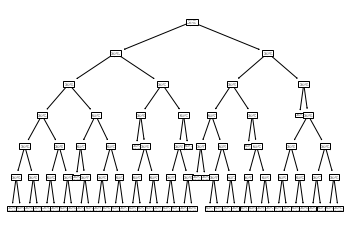

In [179]:
tree.plot_tree(clf)

In [180]:
import graphviz
rtree_g = tree.export_graphviz(clf, out_file =None, feature_names = x.columns, class_names = ['Gonen','jasmine'], filled=True, rounded=True, special_characters =True) 
graph = graphviz.Source(rtree_g) 
graph.render("ricedata")

'ricedata.pdf'